<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#build_TE_df_from_gff3" data-toc-modified-id="build_TE_df_from_gff3-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>build_TE_df_from_gff3</a></span></li><li><span><a href="#import-N2-and-CB-gff3-files-and-make-ginormous-df's" data-toc-modified-id="import-N2-and-CB-gff3-files-and-make-ginormous-df's-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>import N2 and CB gff3 files and make ginormous df's</a></span><ul class="toc-item"><li><span><a href="#get-chromosome-lengths" data-toc-modified-id="get-chromosome-lengths-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>get chromosome lengths</a></span><ul class="toc-item"><li><span><a href="#get_chr_file-(import-chr-file-and-make-df)" data-toc-modified-id="get_chr_file-(import-chr-file-and-make-df)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>get_chr_file (import chr file and make df)</a></span></li><li><span><a href="#fix_chr_names" data-toc-modified-id="fix_chr_names-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>fix_chr_names</a></span></li></ul></li><li><span><a href="#get_relative_positions-(calculate-relative-start-positions-of-transposons-using-chr-lengths-from-chr_df)" data-toc-modified-id="get_relative_positions-(calculate-relative-start-positions-of-transposons-using-chr-lengths-from-chr_df)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>get_relative_positions (calculate relative start positions of transposons using chr lengths from chr_df)</a></span></li></ul></li><li><span><a href="#create_small_range_dataframe" data-toc-modified-id="create_small_range_dataframe-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>create_small_range_dataframe</a></span></li><li><span><a href="#run" data-toc-modified-id="run-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>run</a></span><ul class="toc-item"><li><span><a href="#define-chrom-lengths" data-toc-modified-id="define-chrom-lengths-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>define chrom lengths</a></span></li><li><span><a href="#define-filenames,-generate-dataframes" data-toc-modified-id="define-filenames,-generate-dataframes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>define filenames, generate dataframes</a></span></li><li><span><a href="#make-CB-gff3" data-toc-modified-id="make-CB-gff3-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>make CB gff3</a></span></li><li><span><a href="#make-N2-gff3" data-toc-modified-id="make-N2-gff3-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>make N2 gff3</a></span></li><li><span><a href="#get-index-of-largest-TE-in-N2-and-make-histogram" data-toc-modified-id="get-index-of-largest-TE-in-N2-and-make-histogram-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>get index of largest TE in N2 and make histogram</a></span></li></ul></li><li><span><a href="#calculate-percent-of-genome-that-is-TEs" data-toc-modified-id="calculate-percent-of-genome-that-is-TEs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>calculate percent of genome that is TEs</a></span></li></ul></div>

# imports

In [15]:
from IPython.core.display import display, HTML
from joypy import joyplot
import plotly.express as px

display(HTML("<style>.container { width:100% !important; }</style>"))
from matplotlib import cm
sns.set(style="white")
import proplot as pplt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch

/var/folders/bz/1k14jvcn01d070lxm_c__h800000gn/T/ipykernel_22144/3731248649.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# build_TE_df_from_gff3

In [16]:
def build_TE_df_from_gff3(gff3_file):
    
    gff_chrom_id = ['seq1', 'seq2', 'seq3', 'seq4', 'seq5', 'seq6']
    chromosomes = ['Chr I', 'Chr II', 'Chr III', 'Chr IV', 'Chr V', 'X Chr']
#     chromosomes = ['chrI', 'chrII', 'chrIII', 'chrIV', 'chrV', 'chrX']
    
    gff_list = []
    
    with open(gff3_file, newline = '') as lines:                #open gff file, take as tab delimited, create huge list that is the gff file
        line_reader = csv.reader(lines, delimiter='\t')
        for line in line_reader:
                gff_list.append(line)

    gff_data = []
    
    for i in range(len(gff_list)):
        
#         print(i)
        temp = [ gff_list[i][0], int(gff_list[i][3]), int(gff_list[i][4]), gff_list[i][5], gff_list[i][6] ] #chromsome, start, end, score, strand...
        
        size = int(gff_list[i][4]) - int(gff_list[i][3]) ##get TE size (stop_pos - start_pos) 
        temp.append(size)
        
        class_start = gff_list[i][8].find('(') +1
        class_end = gff_list[i][8].find(')')
        
        class_info = gff_list[i][8][class_start:class_end].split(',') #find transposon class info/descriptions 
        
        if len(class_info) == 3: ##if not a helitron...
            
            family = class_info[0]
            sub_class = class_info[1]
            main_class = class_info[2]


            temp.append(family)
            temp.append(sub_class)
            temp.append(main_class) ##add these three class/ID fields to the temp line
            
        elif len(class_info) == 2: #if a helitron...
            
            family = class_info[0]
            sub_class = '...'
            main_class = class_info[1]


            temp.append(family)
            temp.append(sub_class)
            temp.append(main_class) ##add these three class/ID fields to the temp line
            
        
        gff_data.append(temp) ##append each "line" to data list of lists
      
    gff_df = pd.DataFrame(gff_data, columns=["Chromosome", "Start", "Stop", "Score:Probability", "Strand", 'Size', 'Family', 'Subclass', 'Class']) #turn list of lists into dataframe
    
    for i in range(6):
        
        gff_df['Chromosome'] = gff_df['Chromosome'].replace(gff_chrom_id[i], chromosomes[i]) ##replace TransposonUltimate chromosome names with something better
        
    gff_df_sorted = gff_df.sort_values(by=['Chromosome', 'Start'], axis=0, ascending=True, ignore_index=True) ##sort by chromosome name first, then starting position within each chromosome, reindex rows...
    
    return gff_df_sorted, gff_list

# import N2 and CB gff3 files and make ginormous df's
## get chromosome lengths
### get_chr_file (import chr file and make df)

In [17]:
def get_chr_file(chr_lengths_file):
    chr_lines_list = []
    with open(chr_lengths_file, newline = '') as chr_lines:
        chr_line_reader = csv.reader(chr_lines, delimiter='\t')
        for line in chr_line_reader:
            chr_lines_list.append(line)
            
    N2_chr_list = []
    CB_chr_list = []
    for i in range(len(chr_lines_list)):
        
        if chr_lines_list[i][0] == 'Chr':
            continue
            
        elif chr_lines_list[i][3] == 'Libuda N2':
            chr_lines_list[i][2] = int(chr_lines_list[i][2])
            N2_chr_list.append(chr_lines_list[i])
            
        elif chr_lines_list[i][3] == 'Libuda CB':
            chr_lines_list[i][2] = int(chr_lines_list[i][2])
            CB_chr_list.append(chr_lines_list[i])
            
    N2_chr_df = pd.DataFrame(N2_chr_list, columns = ['chr', 'start', 'end', 'strain'])
    

    CB_chr_df = pd.DataFrame(CB_chr_list, columns = ['chr', 'start', 'end', 'strain'])
            
    return N2_chr_df, CB_chr_df


### fix_chr_names

In [18]:
def fix_chr_names(dataframe):
    for index, row in dataframe.iterrows():
        if dataframe.at[index, 'chr'] == 'I':
            dataframe.at[index, 'chr'] = 'Chr I'
        elif dataframe.at[index, 'chr'] == 'II':
            dataframe.at[index, 'chr'] = 'Chr II'
        elif dataframe.at[index, 'chr'] == 'III':
            dataframe.at[index, 'chr'] = 'Chr III'
        elif dataframe.at[index, 'chr'] == 'IV':
            dataframe.at[index, 'chr'] = 'Chr IV'
        elif dataframe.at[index, 'chr'] == 'V':
            dataframe.at[index, 'chr'] = 'Chr V'
        elif dataframe.at[index, 'chr'] == 'X':
            dataframe.at[index, 'chr'] = 'X Chr'


## get_relative_positions (calculate relative start positions of transposons using chr lengths from chr_df)

In [10]:
def get_relative_positions(all_df, chr_df):
    for index, row in all_df.iterrows():
        for cindex, crow in chr_df.iterrows():
            if all_df.at[index, 'Chromosome'] == chr_df.at[cindex, 'chr']: # if the same chr
                all_df.at[index, 'Relative Start Position'] = int(all_df.at[index, 'Start']) / int(chr_df.at[cindex, 'end']) #



# create_small_range_dataframe

STRINGENT RANGES

**DNA**
* Helitron: 4500 bp 
* CMC: 2500 bp
* Zator: 1800-2400 bp
* hAT: 1000-2000 bp
* Sola: 1- 2000-6000 bp, 2- 4000-5000 bp, 3- 5000-7000 bp
* Tc1/Mariner: 1600 bp
* MITE: 100-800 bp
* Novosib: 

**RETRO**
* Gypsy: 9000 bp
* Copia: 5000 bp
* LINEs: 5000 bp
* SINEs: 600 bp
* ERV: 8000 bp

NON-STRINGENT RANGES

**DNA**
* Helitron: 20000 bp 
* CMC: 20000 bp
* Zator: 15000 bp
* hAT: 20000 bp
* Sola: 7000 bp
* Tc1/Mariner: 20000 bp
* MITE: 1000 bp
* Novosib: 3000

**RETRO**
* Gypsy: 20000 bp
* Copia: 20000 bp
* LINEs: 10000 bp
* SINEs: 600 bp
* ERV: 8000 bp

In [20]:
def create_small_range_dataframe(dataframe):
    
    range_values = {'CMC':20000, 
                    'Helitron':20000, 
                    'Zator':15000, 
                    'hAT':20000, 
                    'Sola':7000, 
                    'Tc1-Mariner':20000,
                    'MITE':1000, 
                    'Novosib':3000,
                    'Copia':20000,
                    'Gypsy':20000,
                    'LINE':10000, 
                    'ERV':8000, 
                    'SINE':600}
    
    filt_counts = {'CMC':0, 'Zator':0, 'hAT':0, 'Gypsy':0, 'Copia':0, 'Sola':0, 'Tc1-Mariner':0,
       'MITE':0, 'Helitron':0, 'Novosib':0, 'LINE':0, 'ERV':0, 'SINE':0}
    
    datalist = dataframe.values.tolist()
    
    filtered_list = []
    elim_list = []
    for i in range(len(datalist)):
        family_name = datalist[i][6]
        if datalist[i][5] <= range_values[family_name]:
            filtered_list.append(datalist[i])
        else:
            elim_list.append(datalist[i])
            
    filtered_dataframe = pd.DataFrame(filtered_list, columns = ['Chromosome', 'Start', 'Stop', 'Score:Probability', 'Strand', 'Size',
       'Family', 'Subclass', 'Class', 'Strain', 'Relative Start Position'])
    elim_dataframe = pd.DataFrame(elim_list, columns = ['Chromosome', 'Start', 'Stop', 'Score:Probability', 'Strand', 'Size',
       'Family', 'Subclass', 'Class', 'Strain', 'Relative Start Position'])
    
    
    original_counts = dataframe['Family'].value_counts().to_dict()
    
    filtered_counts = filtered_dataframe['Family'].value_counts().to_dict()
    elim_counts = elim_dataframe['Family'].value_counts().to_dict()
    
    print('fraction elimimated by filter')
    for key in original_counts.keys():
        filtered = (1- filtered_counts[key]/original_counts[key])
        format_filtered = "{:.5f}".format(filtered)
        print("{0:15} {1}".format(key, format_filtered))

#     print(elim_counts)

    return filtered_dataframe, elim_dataframe

# run

## define chrom lengths

In [21]:
chr_lengths_file = '/Users/coraalbers/Desktop/labfiles/chr_lengths.txt'

N2_chr_df = get_chr_file(chr_lengths_file)[0]
CB_chr_df = get_chr_file(chr_lengths_file)[1]


fix_chr_names(N2_chr_df)
fix_chr_names(CB_chr_df)

## define filenames, generate dataframes


In [22]:
N2_file = '/Users/coraalbers/Desktop/labfiles/reasonaTE_N2_out_LTRRet/finalResults/FinalAnnotations_Transposons.gff3'
CB_file = '/Users/coraalbers/Desktop/labfiles/reasonaTE_CB_out_LTRRet/finalResults/FinalAnnotations_Transposons.gff3'

N2_all_list = build_TE_df_from_gff3(N2_file)
N2_all_df = N2_all_list[0]
N2_data_list = N2_all_list[1]
# for index, row in N2_all_df.iterrows():
#     N2_all_df.at[index, 'Chromosome'] = 'N2_' + N2_all_df.at[index, 'Chromosome']
length = ['N2']*len(N2_all_df.Chromosome) # add strain labels
N2_all_df['Strain'] = length

CB_all_list = build_TE_df_from_gff3(CB_file)
CB_all_df = CB_all_list[0]
CB_data_list = CB_all_list[1]
# for index, row in CB_all_df.iterrows():
#     CB_all_df.at[index, 'Chromosome'] = 'CB_' + CB_all_df.at[index, 'Chromosome']
length2 = ['CB']*len(CB_all_df.Chromosome) # add strain labels
CB_all_df['Strain'] = length2

get_relative_positions(N2_all_df, N2_chr_df)
get_relative_positions(CB_all_df, CB_chr_df)

print('done')

done


In [13]:
N2_all_filter_list = create_small_range_dataframe(N2_all_df)
N2_all_filter_df = N2_all_filter_list[0]
N2_elim_df = N2_all_filter_list[1]

CB_all_filter_list = create_small_range_dataframe(CB_all_df)
CB_all_filter_df = CB_all_filter_list[0]
CB_elim_df = CB_all_filter_list[1]

length = ['N2']*len(N2_all_filter_df.Chromosome)
N2_all_filter_df['Strain'] = length

length2 = ['CB']*len(CB_all_filter_df.Chromosome)
CB_all_filter_df['Strain'] = length2

all_filter_df = pd.concat([N2_all_filter_df, CB_all_filter_df])

N2_dna_tes = N2_all_filter_df[N2_all_filter_df['Class']=='DNATransposon']
N2_retro_tes = N2_all_filter_df[N2_all_filter_df['Class']!='DNATransposon']

CB_dna_tes = CB_all_filter_df[CB_all_filter_df['Class']=='DNATransposon']
CB_retro_tes = CB_all_filter_df[CB_all_filter_df['Class']!='DNATransposon']

all_dna_tes = pd.concat([N2_dna_tes, CB_dna_tes])
all_retro_tes = pd.concat([N2_retro_tes, CB_retro_tes])


fraction elimimated by filter
Zator           0.00044
hAT             0.00025
Tc1-Mariner     0.00107
CMC             0.00533
Sola            0.00243
Gypsy           0.00358
Copia           0.00000
MITE            0.02817
Novosib         0.08000
Helitron        0.00000
SINE            0.00000
ERV             0.00000
LINE            0.00000
fraction elimimated by filter
Zator           0.00011
hAT             0.00026
CMC             0.00248
Tc1-Mariner     0.00129
Sola            0.00851
Gypsy           0.00337
MITE            0.02162
Copia           0.00000
Helitron        0.00000
Novosib         0.17647
SINE            0.00000
LINE            0.00000
ERV             0.00000


## make CB gff3

In [16]:
print('intial', len(CB_data_list))
pop_list = []
for index, row in CB_elim_df.iterrows():
    
    te_start = int(CB_elim_df.at[index, 'Start'])
    
    
    for i in range(len(CB_data_list)):
        
        if int(CB_data_list[i][3]) == te_start:
#             print(i)
            pop_list.append(i)
len(pop_list)
            
for i in sorted(pop_list, reverse=True):
    CB_data_list.pop(i)          
print('final', len(CB_data_list))

# with open("CB_filter2.gff3", "w") as f:
#     wr = csv.writer(f, delimiter = '\t')
#     wr.writerows(CB_data_list)

intial 18113
final 18086


## make N2 gff3

In [17]:
print('initial', len(N2_data_list))
pop_list2 = []
for index, row in N2_elim_df.iterrows():
    
    te_start = N2_elim_df.at[index, 'Start']
    
    
    for i in range(len(N2_data_list)):
        
        if int(N2_data_list[i][3]) == te_start:
#             print(i)
            pop_list2.append(i)
len(pop_list2)
            
for i in sorted(pop_list2, reverse=True):
    N2_data_list.pop(i)          

print('final', len(N2_data_list))

# with open("N2_filter2.gff3", "w") as f:
#     wr = csv.writer(f, delimiter = '\t')
#     wr.writerows(N2_data_list)

initial 18419
final 18392


## get index of largest TE in N2 and make histogram
returns the dataframe index of the largest TE that was removed from the dataset and creates a histogram of the eliminated TEs along size x-axis

3
Tc1-Mariner


,Chromosome,Start,Stop,Score:Probability,Strand,Size,Family,Subclass,Class,Strain,Relative Start Position
0,Chr I,4552762,4785564,22.0,-,232802,Tc1-Mariner,TIR,DNATransposon,N2,0.301227
1,Chr I,4824850,4835599,14:6,+,10749,Novosib,TIR,DNATransposon,N2,0.319229
2,Chr I,11757630,11761213,.,+,3583,Novosib,TIR,DNATransposon,N2,0.777926
3,Chr I,12459191,13021335,8.0,-,562144,Tc1-Mariner,TIR,DNATransposon,N2,0.824344
4,Chr I,12635952,12789632,3.0,-,153680,CMC,TIR,DNATransposon,N2,0.836039
5,Chr I,14253089,14310632,3.0,+,57543,Gypsy,LTR,Retrotransposon,N2,0.943035
6,Chr II,1448835,1464542,6:5,+,15707,Zator,TIR,DNATransposon,N2,0.094622
7,Chr II,13342423,13359148,5:5,-,16725,Zator,TIR,DNATransposon,N2,0.871379
8,Chr II,14319868,14518301,8.0,+,198433,CMC,TIR,DNATransposon,N2,0.935215
9,Chr II,14804906,15026182,13.0,-,221276,CMC,TIR,DNATransposon,N2,0.966892


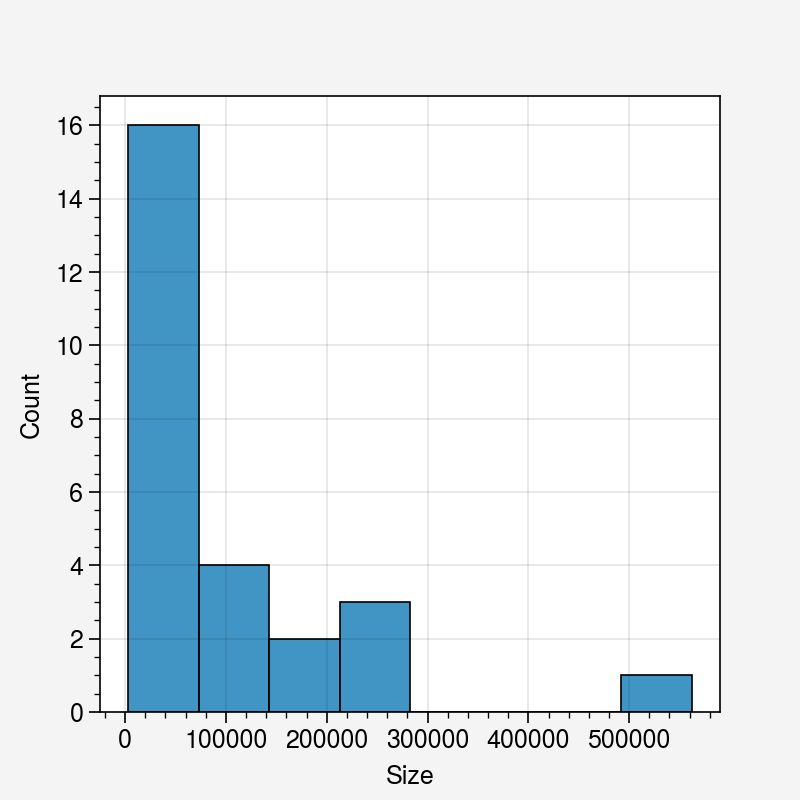

In [15]:
test = N2_elim_df[N2_elim_df['Family'] == 'CMC']
sns.histplot(N2_elim_df, x = 'Size')
i = N2_elim_df['Size'].idxmax()
print(i)
print(N2_elim_df['Family'][i])
N2_elim_df

# calculate percent of genome that is TEs

In [15]:
cbnumber = CB_all_filter_df['Size'].sum()
print(cbnumber)
cbnumber / 98826088

14128385


0.14296209923841163

In [14]:
n2num = N2_all_filter_df['Size'].sum()
print(n2num)
n2num / 100431990

14744236


0.14680816341486413